# Topo - Transform a profile from a local to cartographic coordinates
O.KAUFMANN, 2020, 2021.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, LineString, Polygon
from shapely.affinity import translate, rotate, scale, skew, affine_transform#

In [2]:
from bootsoff.topo.geometry import plot_profile

In [3]:
# profile extremities in local coordinates
profile_start_local = Point([40., 70.])
profile_end_local = Point([90., 120.])
markers_along_profile_local = [Point([55., 75.]), Point([60., 98.]), Point([80.,110.])]

# profile extremities in cartographic coordinates
profile_start_map = Point([98227, 87122])
profile_end_map = Point([98247, 87084])

### Profile in local coordinates (extremities and eventual markers)

In [4]:
profile = [profile_start_local]
profile.extend(markers_along_profile_local)
profile.extend([profile_end_local])
profile_local = LineString(profile)

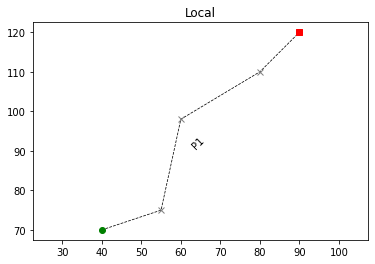

In [5]:
plot_profile(obj=profile_local, name='P1')
plt.gca().set_title('Local');

### Profile extremities in map coordinates

In [6]:
profile_map = LineString([profile_start_map, profile_end_map])

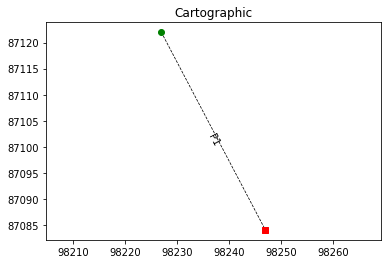

In [7]:
plot_profile(obj=profile_map, name='P1')
plt.gca().set_title('Cartographic');

### The transform consists in:
- A translation to move the start point of the profile to the origin of the local system -> t1
- A rotation to align the profile on the orientation of the profile in the map (cartographic) coordinates -> r
- A scaling (should be close to 1 if units are the same) to accomodate for differences in length -> s
- A translation to bring the start of the profile at its position in the map coordinates -> t2

Left and right plots show the profile before and after each transformations

### Translating

In [8]:
t1 = translate(profile_local, xoff=-profile_local.coords[0][0], yoff=-profile_local.coords[0][1])

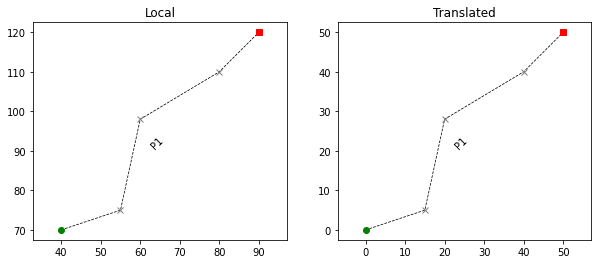

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_profile(ax=ax[0], obj=profile_local, name='P1')
plot_profile(ax=ax[1], obj=t1, name='P1')
ax[0].set_title('Local')
ax[1].set_title('Translated');

### Rotating

In [10]:
theta_local = np.arctan2(profile_local.coords[-1][1]-profile_local.coords[0][1],
                   profile_local.coords[-1][0]-profile_local.coords[0][0])
theta_map = np.arctan2(profile_map.coords[-1][1]-profile_map.coords[0][1],
                   profile_map.coords[-1][0]-profile_map.coords[0][0])
r = rotate(t1, angle=theta_map-theta_local, origin = (0.,0.), use_radians=True)

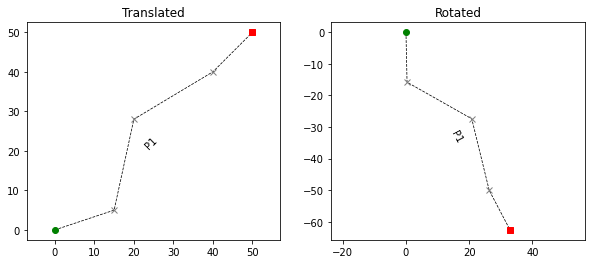

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_profile(ax=ax[0], obj=t1, name='P1')
plot_profile(ax=ax[1], obj=r, name='P1')
ax[0].set_title('Translated')
ax[1].set_title('Rotated');

### Scaling

In [12]:
scale_factor = (profile_map.length/profile_local.length)
s = scale(r, xfact=scale_factor, yfact=scale_factor,  origin=(0.,0.))

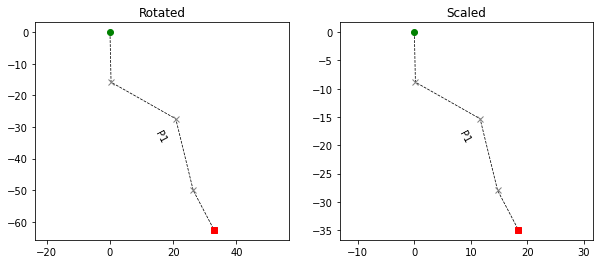

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_profile(ax=ax[0], obj=r, name='P1')
plot_profile(ax=ax[1], obj=s, name='P1')
ax[0].set_title('Rotated')
ax[1].set_title('Scaled');

### Translating

In [14]:
t2 = translate(s, xoff=profile_map.coords[0][0], yoff=profile_map.coords[0][1])

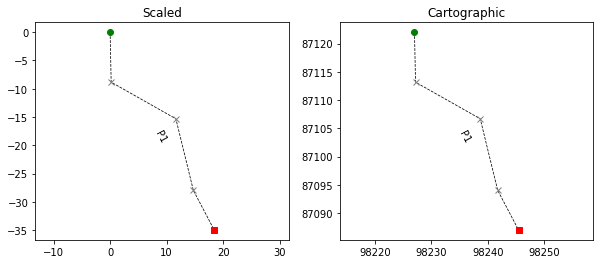

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_profile(ax=ax[0], obj=s, name='P1')
plot_profile(ax=ax[1], obj=t2, name='P1')
ax[0].set_title('Scaled')
ax[1].set_title('Cartographic');

### Transform sum up

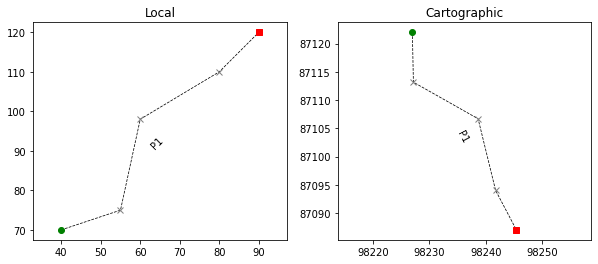

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plot_profile(ax=ax[0], obj=profile_local, name='P1')
plot_profile(ax=ax[1], obj=t2, name='P1')
stepsize=10.
ax[0].set_title('Local')
ax[1].set_title('Cartographic');